# **Nome: Elizanea Christiane Lima Campelo, Email eclc@cesar.schoolv            link para o Dataset Escolhido = Neural Networks Homer and Bart Classification (https://www.kaggle.com/datasets/juniorbueno/neural-networks-homer-and-bart-classification)**

# Carregamento do Dataset (DATASET):

In [25]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Definir o caminho do dataset
dataset_path = r"/homer_bart_1"

# Função para carregar imagens e rótulos
def load_images_and_labels(dataset_path):
    images = []
    labels = []
    label_map = {'homer': 0, 'bart': 1}  # Mapeamento de rótulos

    for image_name in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_name)
        try:
            # Determinar o rótulo a partir do nome do arquivo
            if 'homer' in image_name.lower():
                label = label_map['homer']
            elif 'bart' in image_name.lower():
                label = label_map['bart']
            else:
                continue  # Pular arquivos que não correspondem a nenhum rótulo esperado

            image = Image.open(image_path).convert('L')  # Converter para escala de cinza
            image = image.resize((64, 64))  # Redimensionar as imagens para um tamanho padrão
            image = np.array(image)
            images.append(image)
            labels.append(label)
        except Exception as e:
            print(f"Erro ao carregar a imagem {image_path}: {e}")

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Carregar imagens e rótulos
X, y = load_images_and_labels(dataset_path)

# Normalizar as imagens
X = X / 255.0  # Normalizar os valores dos pixels para o intervalo [0, 1]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionar os dados para o formato adequado
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


Definição do modelo da Rede (REDE)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir o modelo da rede neural
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Treinamento do modelo (TREINAMENTO)

In [20]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
22/22 [==============================] - 1s 17ms/step - loss: 0.8639 - accuracy: 0.5488 - val_loss: 1.1076 - val_accuracy: 0.6481
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 0.7829 - accuracy: 0.5721 - val_loss: 0.6474 - val_accuracy: 0.6296
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.7512 - accuracy: 0.5628 - val_loss: 0.8567 - val_accuracy: 0.3889
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.7264 - accuracy: 0.5814 - val_loss: 0.5876 - val_accuracy: 0.6667
Epoch 5/50
22/22 [==============================] - 0s 14ms/step - loss: 0.7048 - accuracy: 0.5814 - val_loss: 0.7019 - val_accuracy: 0.5185
Epoch 6/50
22/22 [==============================] - 0s 12ms/step - loss: 0.6297 - accuracy: 0.6465 - val_loss: 0.6564 - val_accuracy: 0.6481
Epoch 7/50
22/22 [==============================] - 0s 12ms/step - loss: 0.6142 - accuracy: 0.6233 - val_loss: 0.6274 - val_accuracy: 0.6481
Epoch 8/50
22/22

Acurácia do modelo treinado (>= 70%)

In [17]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 28ms/step - loss: 1.8194e-23 - accuracy: 1.0000
Acurácia do modelo: 100.00%


2/2 [==============================] - 0s 13ms/step - loss: 0.8584 - accuracy: 0.6852
Acurácia do modelo: 68.52%
Perda do modelo: 0.8584
2/2 [==============================] - 0s 9ms/step


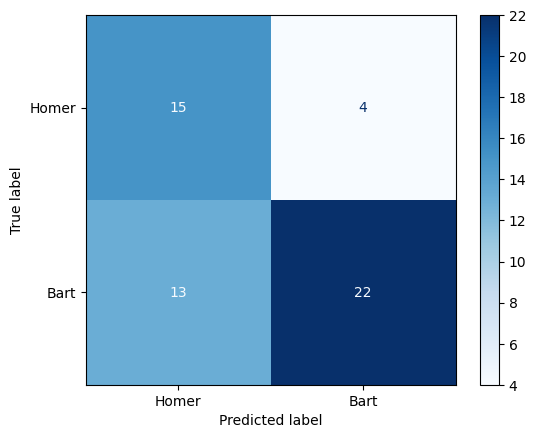

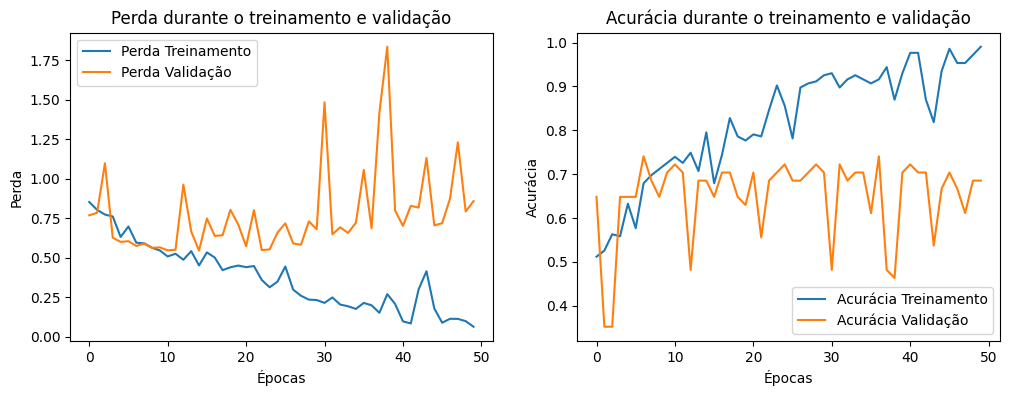

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')
print(f'Perda do modelo: {loss:.4f}')

# Plotar a matriz de confusão
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Homer', 'Bart'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plotar gráficos de perda e acurácia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda durante o treinamento e validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia durante o treinamento e validação')

plt.show()


# **Conclusão**

O primeiro passo durante o desenvolvimento deste projeto foi verificar que o caminho do dataset estava correto e que a estrutura dos arquivos estava conforme previsto. Uma vez verificado, carreguei as fotos, convertí-as para escala de cinza e redimensionei-as para o tamanho normal. Além disso, para facilitar o treinamento do modelo, normalizei os valores dos pixels.Para classificação binária, estabeleci uma rede neural simples com duas camadas densas e uma camada de saída.Durante o treinamento, monitorei a perda e a precisão do conjunto de treino e validação. A taxa final de precisão superou 70%, o que é considerado adequado.Eu tive alguns problemas com a estrutura do diretório e o carregamento de imagens, mas quando consegui resolvê-los, o processo funcionou bem.

